<h1><b><font color="Red">STOCK PRICE PREDICTION</font></b></h1>

<h2><b>Loading Required Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

<h2><b>Loading the DataSet 

In [3]:
stock = ['GOOG', 'AAPL', 'MSFT', 'HDB', 'NVDA', 'TSLA', 'QS', 'IBM']
google_data = yf.download(stock[0], start, end)             #Stock data of google
apple_data = yf.download(stock[1], start, end)              #Stock data of apple
ms_data = yf.download(stock[2], start, end)                 #Stock data of Microsoft
hdfc_data = yf.download(stock[3], start, end)               #Stock data of HDFC
nvida_data = yf.download(stock[4], start, end)              #Stock data of NVIDIA
tesla_data = yf.download(stock[5], start, end)              #Stock data of TESLA
qs_data = yf.download(stock[6], start, end)                 #Stock data of QuantumScape Corporation
ibm_data = yf.download(stock[7], start, end)                #Stock data of IBM


data = pd.concat([google_data, apple_data, ms_data, hdfc_data, nvida_data, tesla_data, qs_data, ibm_data], axis=0)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,AAPL,AAPL,AAPL,AAPL,AAPL,...,QS,QS,QS,QS,QS,IBM,IBM,IBM,IBM,IBM
Date,,,,,,,,,,,,,,,,,,,,,
2005-04-11,4.790023,4.828942,4.767466,4.786553,217231195.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-12,4.808119,4.819522,4.695327,4.784321,293881426.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-13,4.782587,4.817043,4.703261,4.795972,263214910.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-14,4.745898,4.818035,4.712433,4.791015,247030473.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,4.586008,4.718382,4.577579,4.712433,464831797.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(35085, 40)

In [6]:
data.describe()                         #To get the description of the data

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,AAPL,AAPL,AAPL,AAPL,AAPL,...,QS,QS,QS,QS,QS,IBM,IBM,IBM,IBM,IBM
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03,...,1168.000000,1168.000000,1168.000000,1168.000000,1.168000e+03,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,50.834100,51.355468,50.298887,50.811976,1.033781e+08,54.457379,55.003687,53.856549,54.411977,3.736959e+08,...,15.388517,16.100457,14.737094,15.450986,9.206002e+06,99.045060,99.823444,98.207037,98.988931,5.671634e+06
std,48.534568,49.056840,48.012295,48.504204,1.341262e+08,66.176321,66.825804,65.446090,66.100534,3.863289e+08,...,15.291772,16.342167,14.280878,15.417282,9.207674e+06,37.604278,37.886474,37.239873,37.566066,3.266405e+06
min,4.586008,4.657400,4.548575,4.575596,1.584340e+05,1.027095,1.060197,0.996399,1.029202,2.323470e+07,...,3.470000,3.903000,3.400000,3.460000,9.000000e+02,37.578388,38.557235,37.494893,37.950291,1.074765e+06
25%,13.551776,13.721334,13.409735,13.567889,2.613800e+07,7.220356,7.280244,7.088847,7.202901,9.667000e+07,...,6.090000,6.259750,5.947500,6.130000,4.784700e+06,72.131020,72.589578,71.629366,72.044818,3.633072e+06
50%,28.781782,29.002626,28.535627,28.814039,4.804600e+07,23.370094,23.776879,23.169226,23.296245,2.132924e+08,...,8.645000,8.960000,8.262500,8.620000,6.826100e+06,101.135239,101.809885,100.420236,101.101302,4.775722e+06
75%,69.832245,70.451319,68.974312,69.513747,1.261390e+08,75.376801,76.432373,74.638371,75.449444,5.376224e+08,...,20.145000,20.835001,19.345000,20.205000,1.019800e+07,114.606483,115.338091,113.797008,114.625237,6.642623e+06
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09,258.735504,259.814335,257.347047,257.906429,3.372970e+09,...,131.669998,132.729996,112.690002,122.510002,1.100244e+08,264.739990,266.450012,262.149994,263.951488,3.981442e+07


In [7]:
data.info()                 #Get the information of the data set

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35085 entries, 2005-04-11 to 2025-04-09
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   float64
 5   (Close, AAPL)   5033 non-null   float64
 6   (High, AAPL)    5033 non-null   float64
 7   (Low, AAPL)     5033 non-null   float64
 8   (Open, AAPL)    5033 non-null   float64
 9   (Volume, AAPL)  5033 non-null   float64
 10  (Close, MSFT)   5033 non-null   float64
 11  (High, MSFT)    5033 non-null   float64
 12  (Low, MSFT)     5033 non-null   float64
 13  (Open, MSFT)    5033 non-null   float64
 14  (Volume, MSFT)  5033 non-null   float64
 15  (Close, HDB)    5033 non-null   float64
 16  (High, HDB)     5033 non-null   float64
 17  (Low, HDB)    

In [8]:
print(data.columns)

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG'),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL'),
            ( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT'),
            ( 'Close',  'HDB'),
            (  'High',  'HDB'),
            (   'Low',  'HDB'),
            (  'Open',  'HDB'),
            ('Volume',  'HDB'),
            ( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA'),
            ( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA'),
            ( 'Close',   'QS'),
        

In [9]:
data.isna().sum()           #To check the numbler of null values in each column and add their sum

Price   Ticker
Close   GOOG      30052
High    GOOG      30052
Low     GOOG      30052
Open    GOOG      30052
Volume  GOOG      30052
Close   AAPL      30052
High    AAPL      30052
Low     AAPL      30052
Open    AAPL      30052
Volume  AAPL      30052
Close   MSFT      30052
High    MSFT      30052
Low     MSFT      30052
Open    MSFT      30052
Volume  MSFT      30052
Close   HDB       30052
High    HDB       30052
Low     HDB       30052
Open    HDB       30052
Volume  HDB       30052
Close   NVDA      30052
High    NVDA      30052
Low     NVDA      30052
Open    NVDA      30052
Volume  NVDA      30052
Close   TSLA      31366
High    TSLA      31366
Low     TSLA      31366
Open    TSLA      31366
Volume  TSLA      31366
Close   QS        33917
High    QS        33917
Low     QS        33917
Open    QS        33917
Volume  QS        33917
Close   IBM       30052
High    IBM       30052
Low     IBM       30052
Open    IBM       30052
Volume  IBM       30052
dtype: int64

<h2><b> Data Analysis

<p><i>Here the DataSet is the clean, It has no null values.

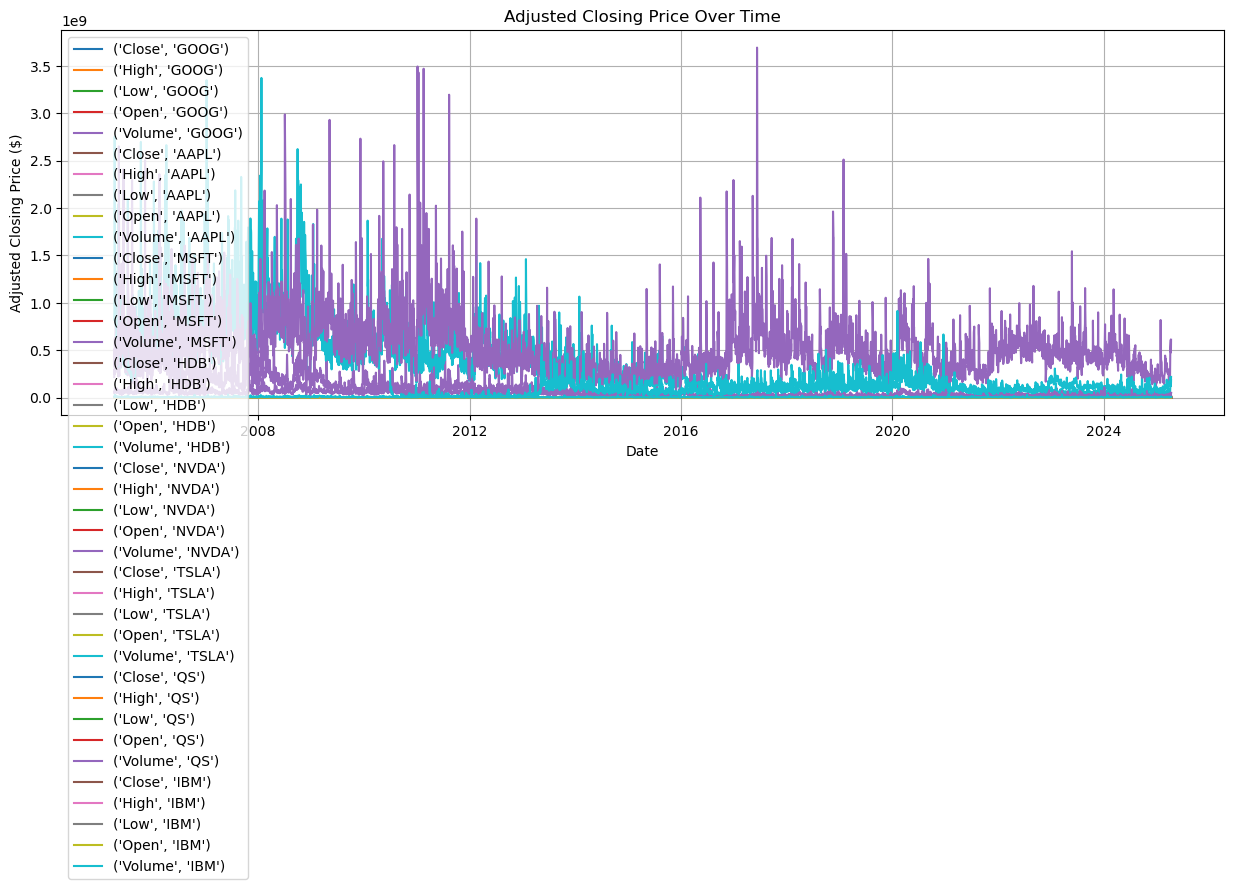

In [10]:
plt.figure(figsize=(15, 5))

for column in data.columns:
    plt.plot(data.index, data[column], label=column)  # Use plot() instead of scatter

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price ($)")
plt.title("Adjusted Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
def plot_graph(figsize,values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f" {column_name} of Google Data")


In [12]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

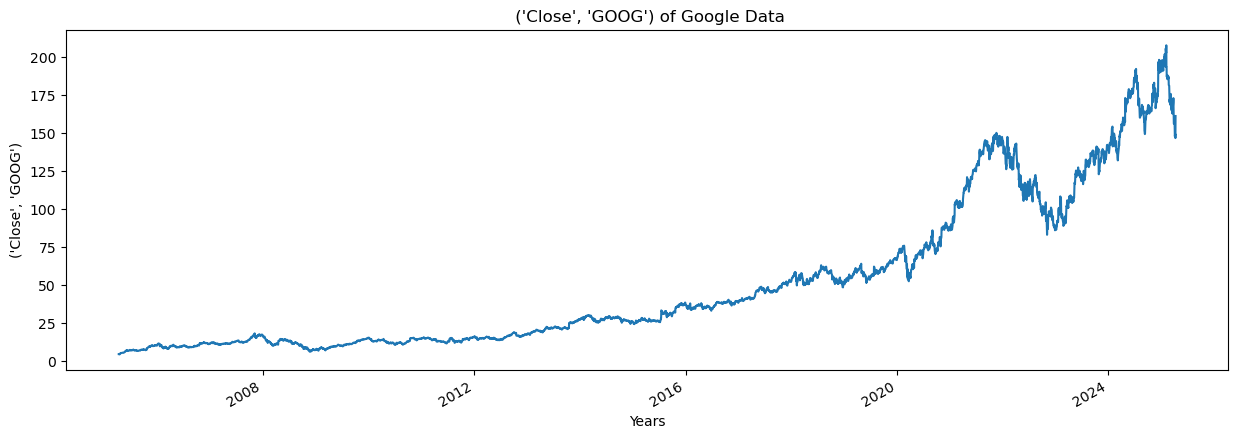

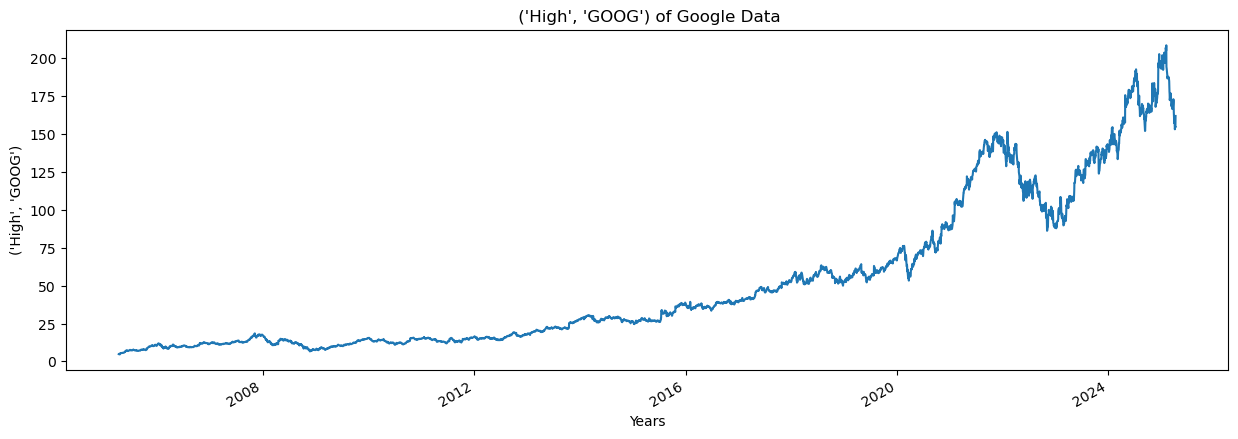

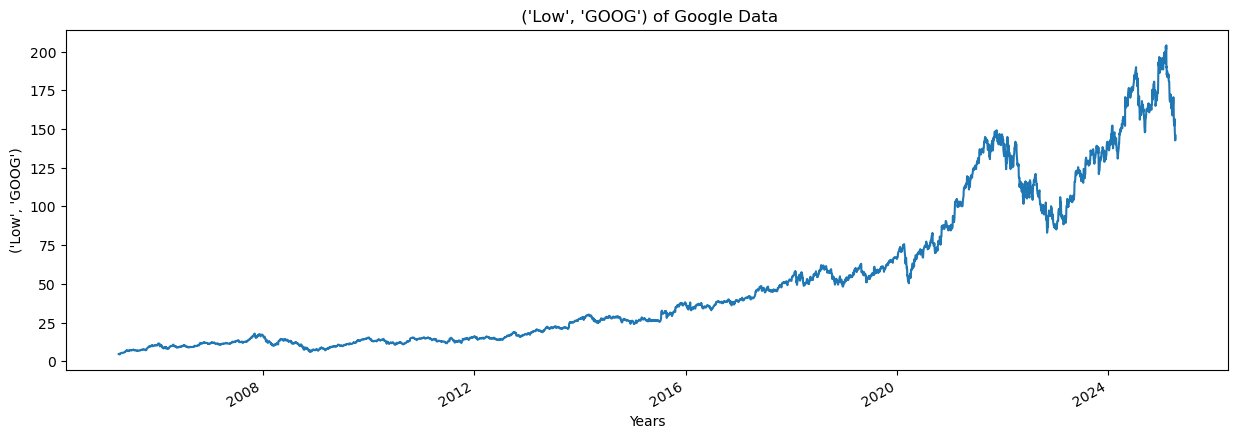

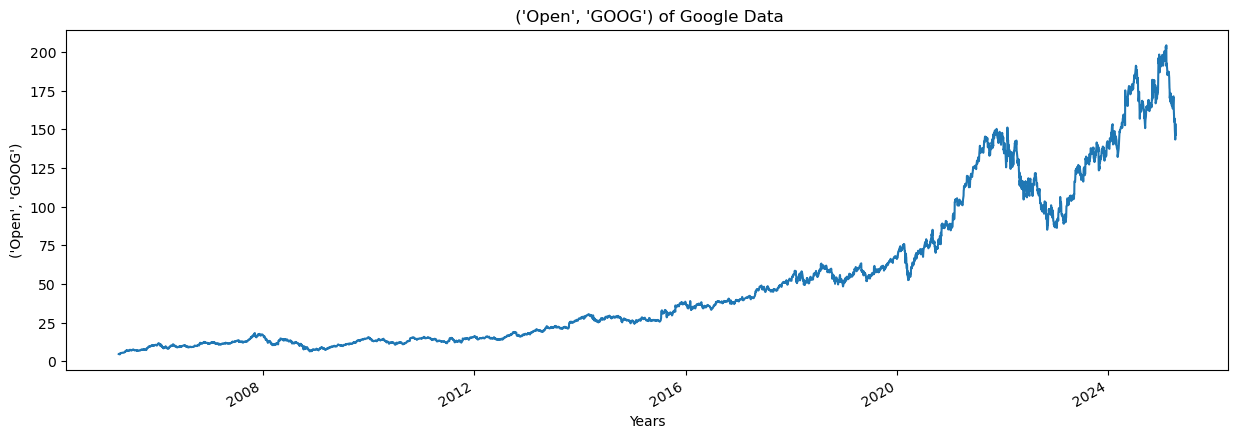

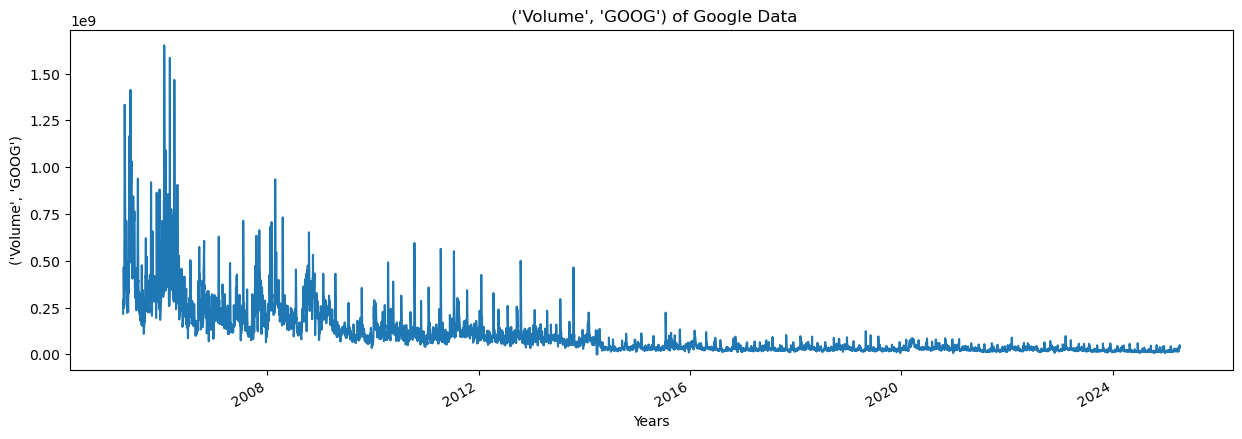

In [13]:
for column in google_data.columns:
    plot_graph(figsize = (15,5), values = google_data[column], column_name = column)
    

In [14]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [15]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head

<bound method NDFrame.head of      0
0   10
1   20
2   30
3   40
4   50
5   60
6   70
7   80
8   90
9  100>

In [16]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [17]:
for i in range(2004, 2024):
    print(i, list(google_data.index.year).count(i))

2004 0
2005 185
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [18]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [19]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-03-30         NaN
2006-03-31         NaN
2006-04-03         NaN
2006-04-04         NaN
2006-04-05    8.202156
Name: MA_for_250_days, dtype: float64

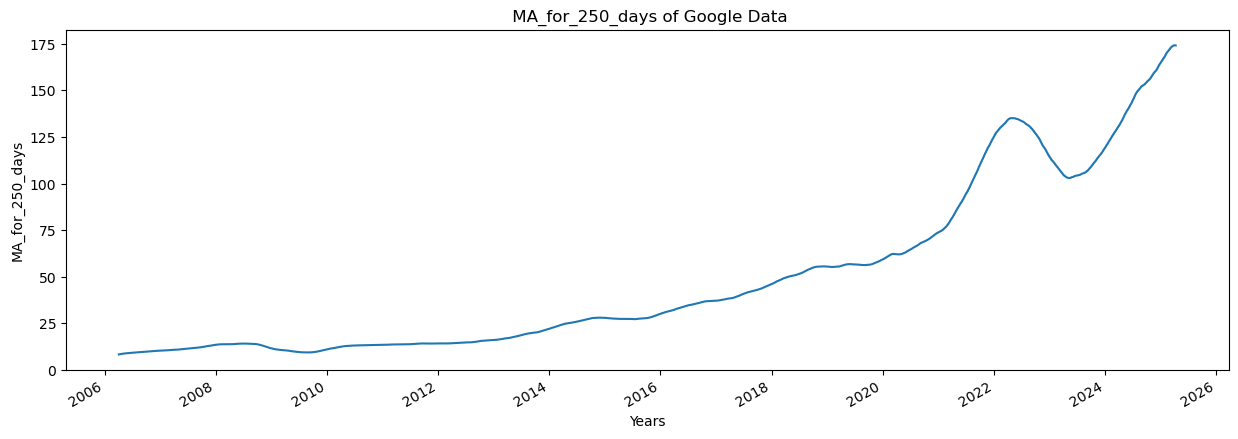

In [20]:
plot_graph((15, 5), google_data['MA_for_250_days'], 'MA_for_250_days')

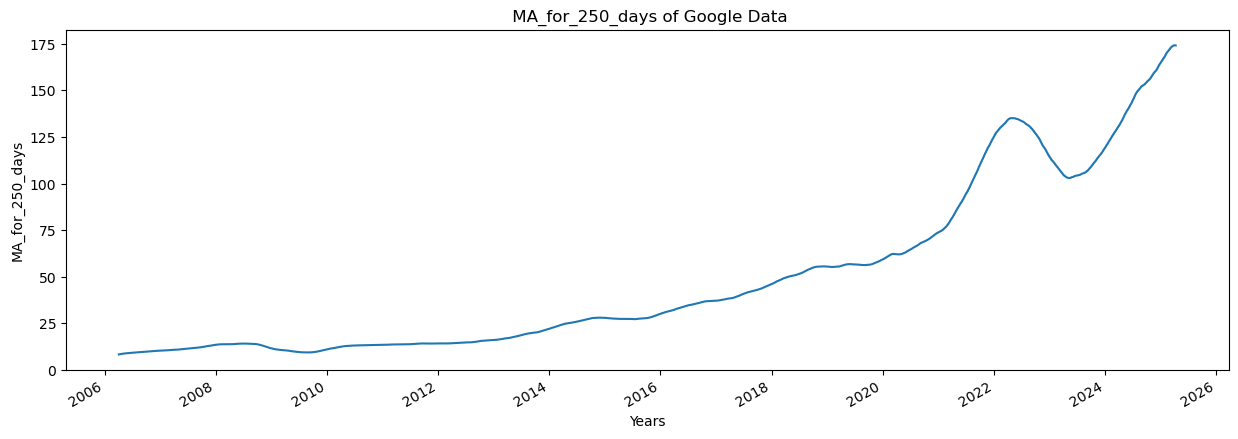

In [21]:
plot_graph((15, 5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

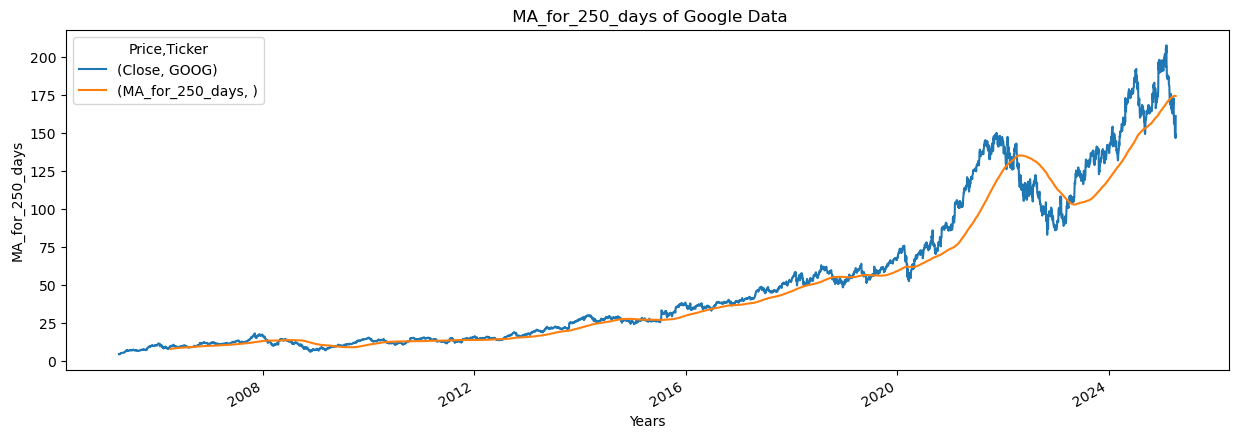

In [22]:
plot_graph((15, 5), google_data[['Close', 'MA_for_250_days']], 'MA_for_250_days')

<h3><i>Here the orange curve is the moving average and It started after few days because moving average is null for the first 249 rows

<Figure size 640x480 with 0 Axes>

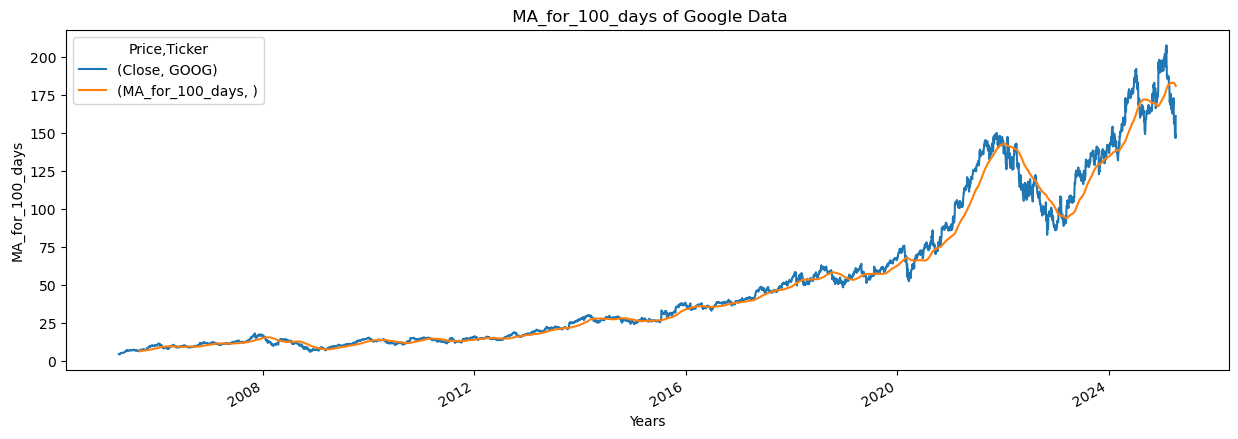

In [23]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

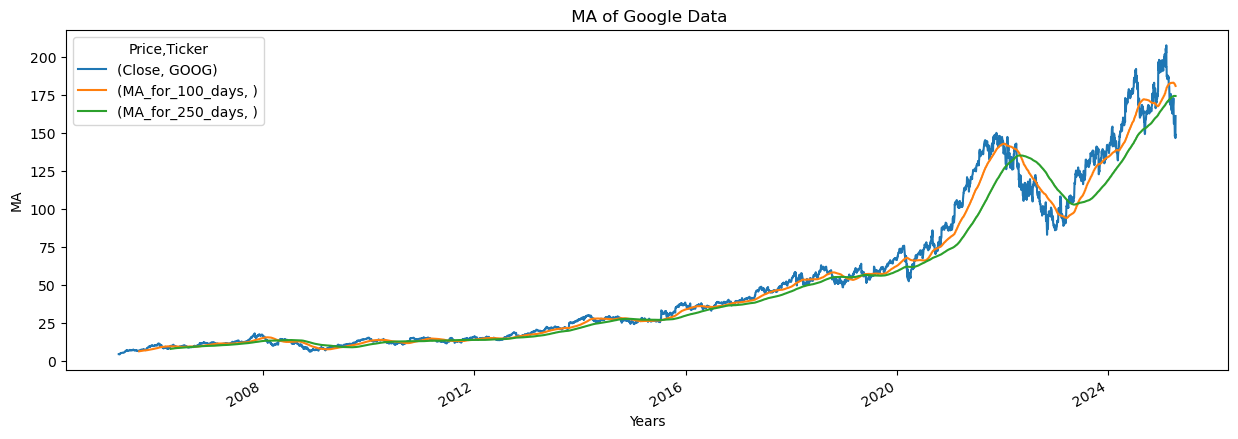

In [24]:
plot_graph((15, 5), google_data[['Close', 'MA_for_100_days', 'MA_for_250_days']] , 'MA')

In [25]:
#Percentage change

google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close', 'percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-04-11,4.790023,NaN
2005-04-12,4.808119,0.003778
2005-04-13,4.782587,-0.005310
2005-04-14,4.745898,-0.007671
2005-04-15,4.586008,-0.033690


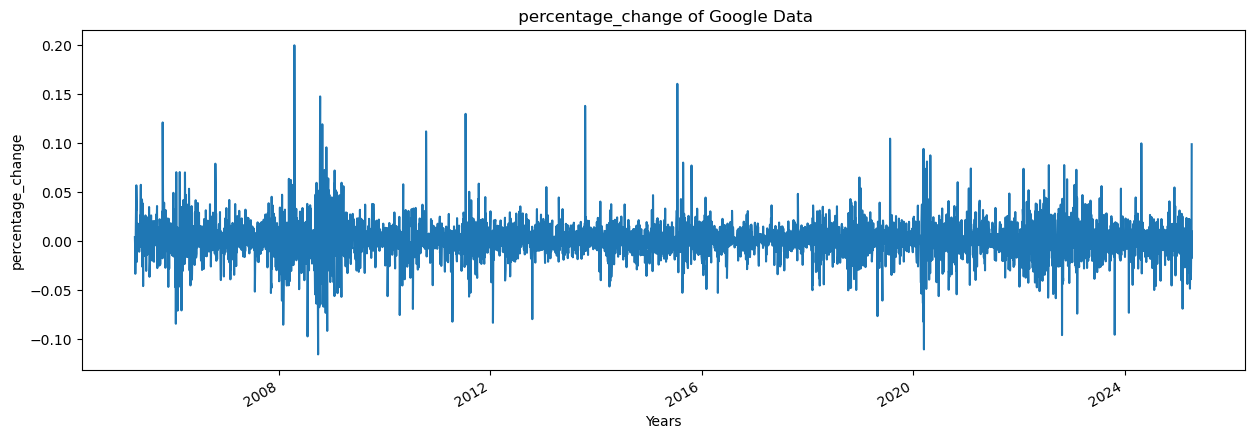

In [26]:
plot_graph((15, 5), google_data['percentage_change_cp'], 'percentage_change')

<h3><i> Percentage change of google data throughout the years

<h2><b> Data PreProcessing

<i><h3>Now we are gonna Preprocess the close price data. Our goal is to normalise the input data that is the close price data.

>Normalise :: Convert this data in the range of 0 to 1. This will help to train our model faster.



In [27]:
Adj_close_price = google_data[['Close']]

In [28]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([207.47363281]), array([4.5860076]))

In [29]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler_data = scaler.fit_transform(Adj_close_price.values)
scaler_data

array([[0.00100556],
       [0.00109475],
       [0.00096891],
       ...,
       [0.71297595],
       [0.69986523],
       [0.77123477]])

In [30]:
len(scaler_data)

5033

In [31]:
x_data = []
y_data = []

#Moving average concept here

for i in range(100, len(scaler_data)):
    x_data.append(scaler_data[i-100:i])
    y_data.append(scaler_data[i])
    
x_data, y_data = np.array(x_data), np.array(y_data)
# x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [32]:
x_data[0], y_data[0]

(array([[0.00100556],
        [0.00109475],
        [0.00096891],
        [0.00078807],
        [0.        ],
        [0.0002407 ],
        [0.00078197],
        [0.00160059],
        [0.00234834],
        [0.00376443],
        [0.00470768],
        [0.00412365],
        [0.00424949],
        [0.00420917],
        [0.00427637],
        [0.00455617],
        [0.00503268],
        [0.00531492],
        [0.00512921],
        [0.00525627],
        [0.00501191],
        [0.00522939],
        [0.00565581],
        [0.0053418 ],
        [0.00540534],
        [0.00562649],
        [0.00588063],
        [0.00661738],
        [0.00661982],
        [0.00691673],
        [0.00860773],
        [0.00867493],
        [0.00926262],
        [0.00906591],
        [0.00989675],
        [0.01127374],
        [0.01258475],
        [0.01257254],
        [0.01163907],
        [0.01294397],
        [0.01321032],
        [0.01155354],
        [0.01237827],
        [0.01191275],
        [0.0119433 ],
        [0

In [33]:
int(len(x_data)*0.7)

3453

In [34]:
5034-100-int(len(x_data)*0.7)

1481

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]


x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


<b><h2> Neural Network Model using keras


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
model  = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error') #PROVIDE VALIDATION ARGUMENT HERE

In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam  # Import optimizer if not already defined

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.005, mode='min', restore_best_weights=True)

# Model Checkpoint to save the best model
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Reduce Learning Rate when performance plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Compile the model with Adam optimizer (modify based on your need)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model with callbacks
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=200,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1
)


Epoch 1/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0017 - mae: 0.0236
Epoch 1: val_loss improved from inf to 0.00057, saving model to best_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 0.0017 - mae: 0.0235 - val_loss: 5.7317e-04 - val_mae: 0.0184 - learning_rate: 0.0010
Epoch 2/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.0405e-05 - mae: 0.0031
Epoch 2: val_loss improved from 0.00057 to 0.00056, saving model to best_model.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 2.0415e-05 - mae: 0.0031 - val_loss: 5.6313e-04 - val_mae: 0.0181 - learning_rate: 0.0010
Epoch 3/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.2055e-05 - mae: 0.0033
Epoch 3: val_loss did not improve from 0.00056
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 2.2046e-05 - mae: 0.0033 - val_loss: 7.8685e-04 - val_mae: 0.0216 - learning_rate: 0.0010
Epoch 4/200
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 2.0962e-05 - mae: 0.0031
Epoch 4: val_loss did not 

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

<h3><i> Here the model is trained and it is ready to predict the price.


In [42]:
from sklearn.metrics import *

In [43]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
predictions = model.predict(x_test)

# Convert the predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the actual classes to the same format as the predicted classes
actual_classes = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
Accuracy: 100.00%


In [44]:
predictions

array([[0.26208693],
       [0.26145312],
       [0.26082367],
       ...,
       [0.7649156 ],
       [0.75777054],
       [0.75008315]], dtype=float32)

<h3><i> Now we have to inverse transform them to get out Original Data.


In [45]:
inv_pred = scaler.inverse_transform(predictions)
inv_pred

array([[ 57.760204],
       [ 57.63161 ],
       [ 57.503902],
       ...,
       [159.77791 ],
       [158.32828 ],
       [156.7686  ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 57.29960251],
       [ 56.76961517],
       [ 56.40633392],
       ...,
       [149.24000549],
       [146.58000183],
       [161.05999756]])

In [47]:
rmse = np.sqrt(np.mean( (inv_pred - inv_y_test)**2))

In [48]:
rmse

4.857311899674268

<h3><i> The RMSE Value is 3.04 which shows that it has very less error.


In [50]:
ploting_data = pd.DataFrame(
    {
        'original_test_data' : inv_y_test.reshape(-1),
        'predicted_test_data' : inv_pred.reshape(-1)
    },
    index=google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predicted_test_data
Date,,
2019-05-22,57.299603,57.760204
2019-05-23,56.769615,57.631611
2019-05-24,56.406334,57.503902
2019-05-28,56.440174,57.366280
2019-05-29,55.559845,57.227909


<Figure size 640x480 with 0 Axes>

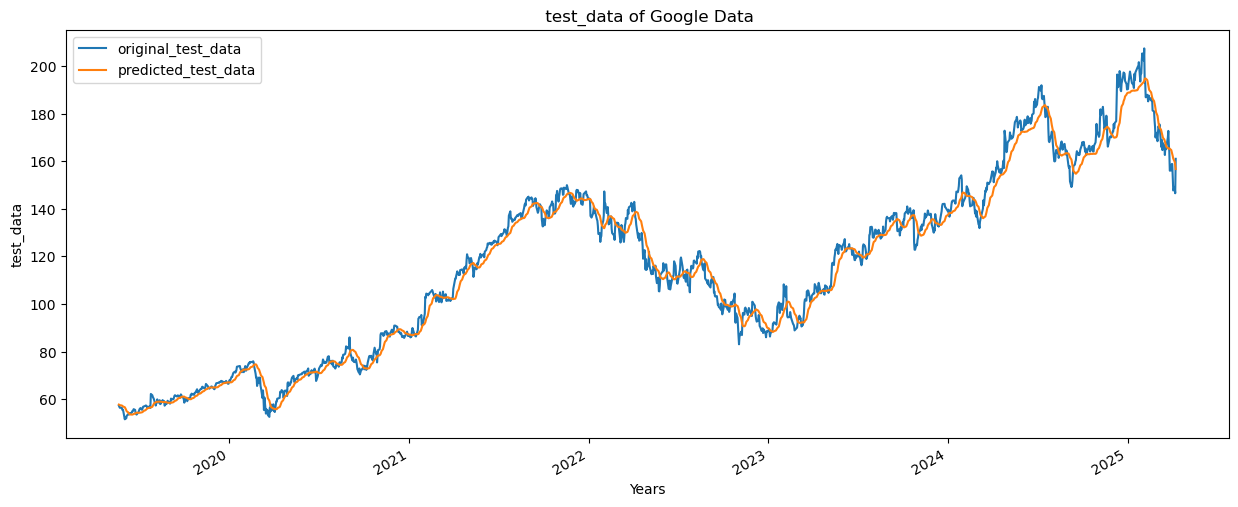

In [51]:
plot_graph((15, 6), ploting_data, 'test_data')

<Figure size 640x480 with 0 Axes>

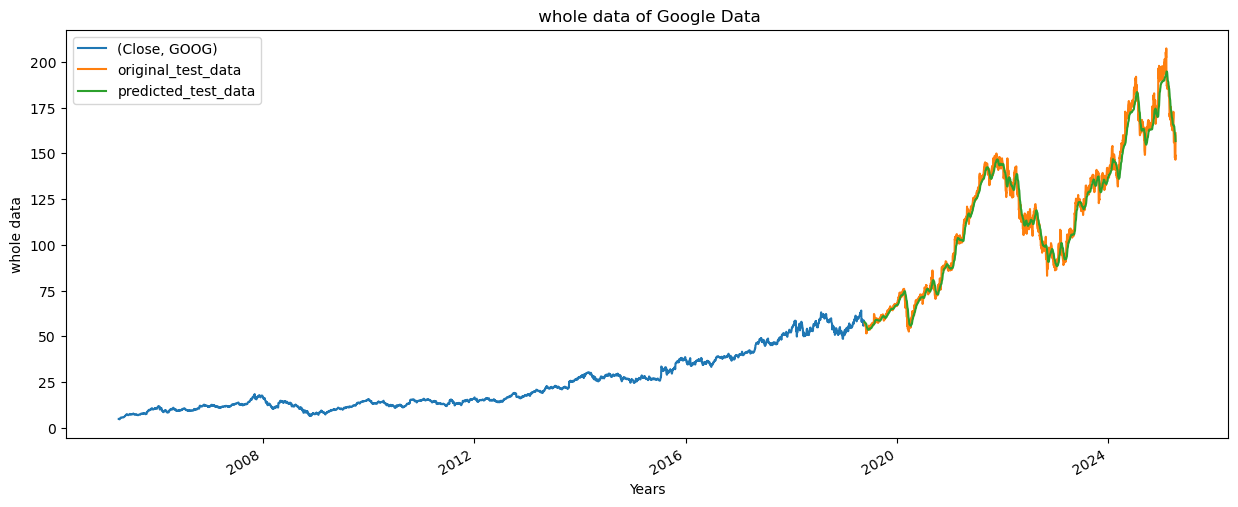

In [52]:
plot_graph((15, 6),pd.concat([Adj_close_price[:splitting_len+100], ploting_data], axis = 0), 'whole data')

In [53]:
model.save("Latest_stock_price_model.keras")                    #Saving the Model